In [1]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

client = MongoClient('localhost:27017')
db = client.hiwi
collection = db.production_steps

database = {}
database['features'] = {}
index = []

query_1 = {"$and": [{"type": "formation"}, {"substep": "soacking"}, {"features": {"$exists": True}}]}
query_1 = list(collection.find(query_1))
database['features']['soacking_state'] = []
database['features']['soacking_success'] = []
database['features']['soacking_start_voltage'] = []
for i in range(len(query_1)):
    database['features']['soacking_state'].append(query_1[i]['features'][0]['value'])
    database['features']['soacking_success'].append(query_1[i]['features'][1]['value'])
    database['features']['soacking_start_voltage'].append(query_1[i]['features'][2]['value'])
    index.append(query_1[i]['cell_id'])

query_2 = {"$and": [{"type": "formation"}, {"substep": "precharge"}, {"features": {"$exists": True}}]}
query_2 = list(collection.find(query_2))
database['features']['precharge_start_voltage'] = []
database['features']['precharge_duration'] = []
database['features']['precharge_energy'] = []
database['features']['precharge_success'] = []
database['features']['precharge_continuity'] = []
for i in range(len(query_2)):
    database['features']['precharge_start_voltage'].append(query_2[i]['features'][0]['value'])
    database['features']['precharge_duration'].append(query_2[i]['features'][1]['value'])
    database['features']['precharge_energy'].append(query_2[i]['features'][2]['value'])
    database['features']['precharge_success'].append(query_2[i]['features'][3]['value'])
    database['features']['precharge_continuity'].append(query_2[i]['features'][4]['value'])

query_3 = {"$and": [{"type": "formation"}, {"substep": "charge"}, {"features": {"$exists": True}}]}
query_3 = list(collection.find(query_3))
database['features']['charge_start_voltage'] = []
database['features']['charge_duration'] = []
database['features']['charge_energy'] = []
database['features']['charge_success'] = []
database['features']['charge_continuity'] = []
for i in range(len(query_3)):
    database['features']['charge_start_voltage'].append(query_3[i]['features'][0]['value'])
    database['features']['charge_duration'].append(query_3[i]['features'][1]['value'])
    database['features']['charge_energy'].append(query_3[i]['features'][2]['value'])
    database['features']['charge_success'].append(query_3[i]['features'][3]['value'])
    database['features']['charge_continuity'].append(query_3[i]['features'][4]['value'])

query_4 = {"$and": [{"type": "formation"}, {"substep": "discharge"}, {"features": {"$exists": True}}]}
query_4 = list(collection.find(query_4))
database['features']['discharge_start_voltage'] = []
database['features']['discharge_duration'] = []
database['features']['discharge_energy'] = []
database['features']['discharge_success'] = []
database['features']['discharge_continuity'] = []
for i in range(len(query_4)):
    database['features']['discharge_start_voltage'].append(query_4[i]['features'][0]['value'])
    database['features']['discharge_duration'].append(query_4[i]['features'][1]['value'])
    database['features']['discharge_energy'].append(query_4[i]['features'][2]['value'])
    database['features']['discharge_success'].append(query_4[i]['features'][3]['value'])
    database['features']['discharge_continuity'].append(query_4[i]['features'][4]['value'])

labels = pd.read_csv("/Users/rampageyao/Desktop/data-meet-master/app/data/4_raw_q/labels.csv", delimiter=";")
labels = (labels.iloc[:, 1]).tolist()
database['features']['qdot_labels'] = labels

data = pd.DataFrame(database['features'])

class_le = LabelEncoder()
for column in data[['soacking_state', 'precharge_continuity', 'charge_continuity', 'discharge_continuity', 'soacking_success', 'precharge_success', 'charge_success', 'discharge_success']].columns:
    data[column] = class_le.fit_transform(data[column].values)
# get all features and store them into dataframe


In [2]:
print(index)

['Q_219', 'Q_162', 'Q_165', 'Q_170', 'Q_188', 'Q_177', 'Q_176', 'Q_189', 'Q_171', 'Q_229', 'Q_250', 'Q_164', 'Q_163', 'Q_224', 'Q_201', 'Q_223', 'Q_169', 'Q_191', 'Q_236', 'Q_248', 'Q_184', 'Q_183', 'Q_240', 'Q_247', 'Q_249', 'Q_237', 'Q_182', 'Q_185', 'Q_200', 'Q_222', 'Q_207', 'Q_190', 'Q_168', 'Q_197', 'Q_213', 'Q_246', 'Q_214', 'Q_241', 'Q_187', 'Q_180', 'Q_235', 'Q_232', 'Q_195', 'Q_192', 'Q_205', 'Q_227', 'Q_202', 'Q_220', 'Q_243', 'Q_216', 'Q_244', 'Q_193', 'Q_194', 'Q_221', 'Q_204', 'Q_181', 'Q_186', 'Q_179', 'Q_233', 'Q_234', 'Q_210', 'Q_245', 'Q_217', 'Q_242', 'Q_173', 'Q_174', 'Q_239', 'Q_199', 'Q_209', 'Q_198', 'Q_208', 'Q_175', 'Q_172', 'Q_238']


Text(0, 0.5, 'Cumulative Explained Variance')

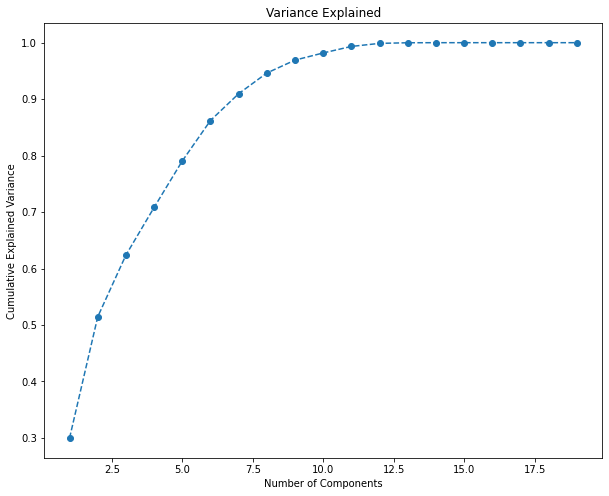

In [3]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(data)

pca = PCA()
pca.fit(segmentation_std)
plt.figure(figsize=(10,8))
plt.plot(range(1,20), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [4]:
# from above we select 6
pca = PCA(n_components=6)
pca.fit(segmentation_std)
scores_pca = pca.transform(segmentation_std)

data_pca = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_pca.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']
data = data_pca[['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']]
data.head()
# now we have new representation of all original features, they are highly abstract and not correlated to each other

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,1.581512,-1.450303,-0.196504,0.185778,0.292020,-1.111450
1,-8.649754,9.813982,1.985825,1.679128,-0.795639,-1.526134
2,-0.758959,-0.037981,-0.531659,-0.851269,0.014542,0.036408
3,-1.322067,0.251811,-0.793050,-0.890652,-0.078630,0.476011
4,-0.651042,-0.888338,1.010186,-0.705367,-0.837892,-0.131133


In [5]:
data['index'] = index
data.head()

<ipython-input-5-c16662db9c30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index'] = index


,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,index
0,1.581512,-1.450303,-0.196504,0.185778,0.292020,-1.111450,Q_219
1,-8.649754,9.813982,1.985825,1.679128,-0.795639,-1.526134,Q_162
2,-0.758959,-0.037981,-0.531659,-0.851269,0.014542,0.036408,Q_165
3,-1.322067,0.251811,-0.793050,-0.890652,-0.078630,0.476011,Q_170
4,-0.651042,-0.888338,1.010186,-0.705367,-0.837892,-0.131133,Q_188


In [7]:
data = data.sort_values(by = ['index'])
data = data.drop(['index'], axis = 1)
data.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
1,-8.649754,9.813982,1.985825,1.679128,-0.795639,-1.526134
12,-1.312258,1.415322,-0.315306,-1.217011,0.198489,0.291699
11,-1.609263,0.615406,-1.165575,-0.475994,0.078730,0.404295
2,-0.758959,-0.037981,-0.531659,-0.851269,0.014542,0.036408
32,-1.155555,0.411131,-0.950575,0.268977,-0.273236,-0.545410
